# Problem 8

## Step 1: Data Loading and Initial Inspection

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

# Set random state for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

df = pd.read_csv('Q8-diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Step 2: Data Splitting (Part A)

In [29]:
# Split data into features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (614, 8)
Test set shape: (154, 8)


## Step 3: Decision Tree Training (Part B)

In [30]:
# Initialize and train Decision Tree with Gini criterion
dt = DecisionTreeClassifier(
    criterion='gini', max_depth=5, random_state=RANDOM_STATE)
dt.fit(X_train, y_train)

print("Decision Tree trained successfully!")

Decision Tree trained successfully!


## Step 4: Visualize the Decision Tree (Part C)

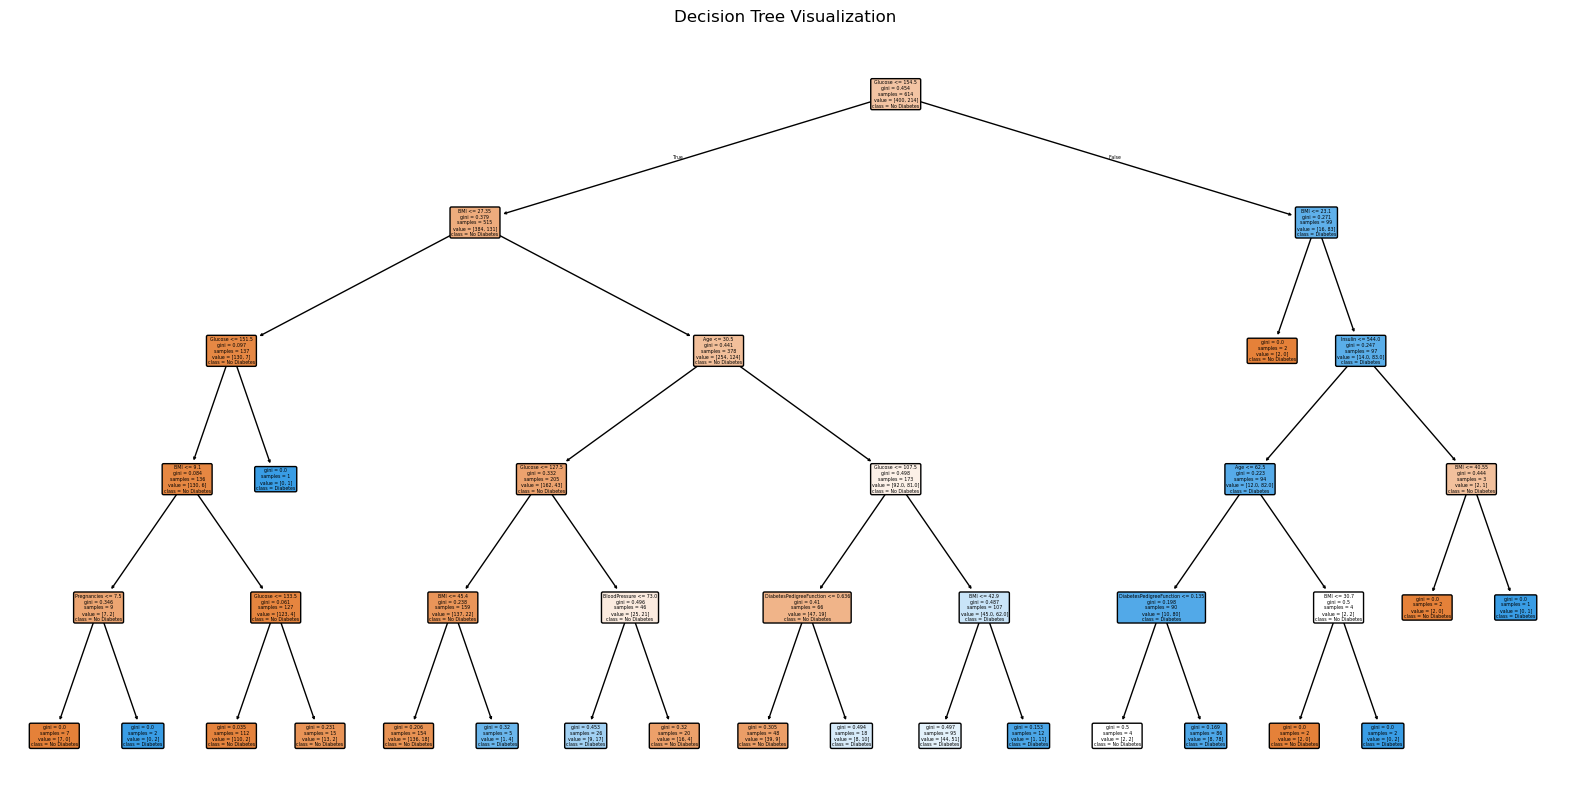

In [31]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    filled=True,
    feature_names=X.columns,
    class_names=['No Diabetes', 'Diabetes'],
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()

## Step 5: Evaluate Model Accuracy (Part D)

In [32]:
# Predict on test set
y_pred = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7922


## Step 6: Feature Importance Analysis (Part E)

In [33]:
# Get feature importances
importances = dt.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Display top features
print("Top two important features:")
display(feature_importance.head(2))

# Store top two features
top_two_features = feature_importance.head(2)['Feature'].values

Top two important features:


,Feature,Importance
1,Glucose,0.558032
5,BMI,0.228136


## Step 7: Simplified Model with Top Features (Part F)

In [37]:
# Select only top two features
X_train_top2 = X_train[top_two_features]
X_test_top2 = X_test[top_two_features]

# Train new model with max_depth=5
dt_top2 = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=RANDOM_STATE
)
dt_top2.fit(X_train_top2, y_train)

# Evaluate simplified model
y_pred_top2 = dt_top2.predict(X_test_top2)
accuracy_top2 = accuracy_score(y_test, y_pred_top2)
print(f"Test Accuracy with top 2 features: {accuracy_top2:.4f}")

Test Accuracy with top 2 features: 0.6948


<Figure size 1000x800 with 0 Axes>

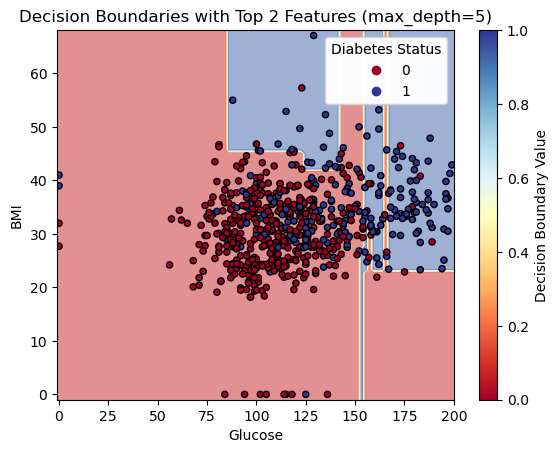

In [35]:
# Plot decision boundaries
plt.figure(figsize=(10, 8))
DecisionBoundaryDisplay.from_estimator(
    dt_top2,
    X_train_top2,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    alpha=0.5
)

# Create a scatter plot with proper legend
scatter = plt.scatter(
    X_train_top2.iloc[:, 0],
    X_train_top2.iloc[:, 1],
    c=y_train,
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=20,
    label=y_train.map({0: 'No Diabetes', 1: 'Diabetes'})  # Map numeric labels to text
)

# Add legend with proper labels
legend1 = plt.legend(*scatter.legend_elements(),
                    title="Diabetes Status",
                    loc="upper right")
plt.gca().add_artist(legend1)

# Add axis labels and title
plt.xlabel(top_two_features[0])
plt.ylabel(top_two_features[1])
plt.title("Decision Boundaries with Top 2 Features (max_depth=5)")

# Add colorbar to show the decision boundary values
plt.colorbar(scatter, label='Decision Boundary Value')

plt.show()

## Step 8: Visualize Simplified Tree (Part F continuation)

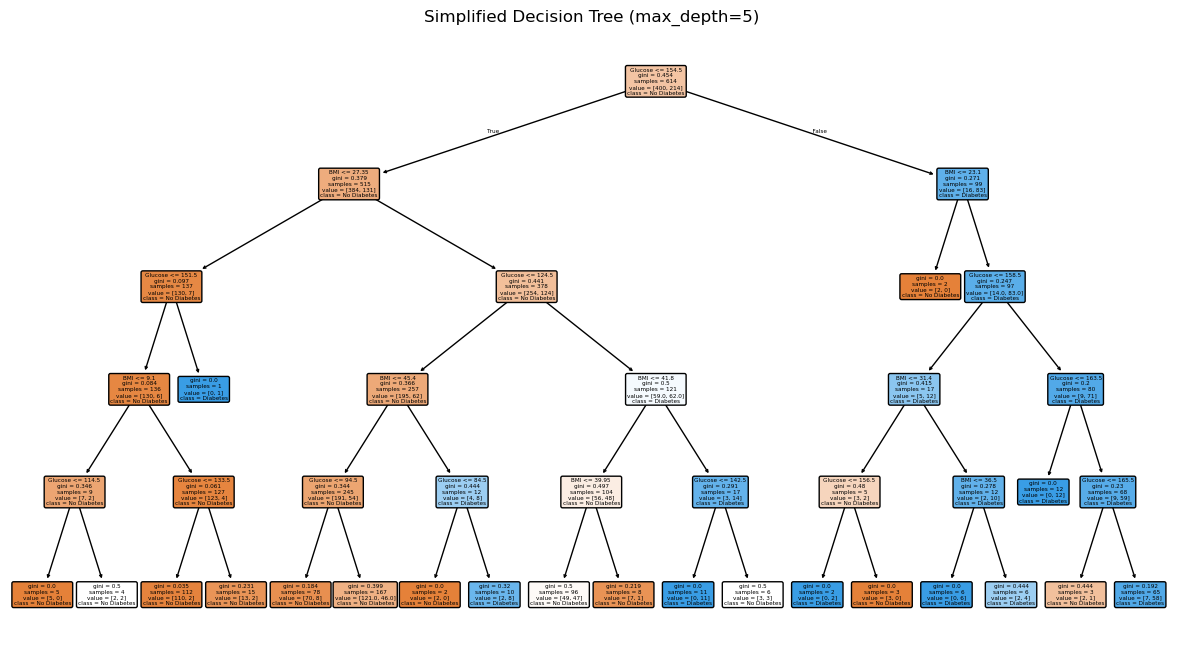

In [36]:
# Plot the simplified tree
plt.figure(figsize=(15, 8))
plot_tree(
    dt_top2,
    filled=True,
    feature_names=top_two_features,
    class_names=['No Diabetes', 'Diabetes'],
    rounded=True
)
plt.title("Simplified Decision Tree (max_depth=5)")
plt.show()

### **Results & Interpretation**

#### **1. Model Performance**
| Model | Features Used | Test Accuracy |
|--------|----------------|---------------|
| Full Decision Tree | All Features (`max_depth=5`) | **79.22%** |
| Simplified Decision Tree | Top 2 Features (`max_depth=5`) | **69.48%** |

#### **2. Key Observations**
- The **full model (all features)** performs better (**79.22% accuracy**) because it has access to more information.  
- The **simplified model (only 2 features)** has slightly lower accuracy (**69.48%**) but is more interpretable and computationally efficient.  
- The **~10% drop in accuracy** suggests that while the top 2 features are important, the remaining features still contribute meaningfully to predictions.  

---

#### **Step-by-Step Workflow**
1. **Data Splitting (Part A)**  
   - Divided data into **80% training, 20% testing** (stratified to maintain class balance).  
   - Ensures fair evaluation by testing on unseen data.  

2. **Full Decision Tree (Part B-D)**  
   - Trained an **unconstrained** `DecisionTreeClassifier` (Gini impurity).  
   - Achieved **79.22% accuracy** (baseline for comparison).  
   - Visualized the full tree (complex, prone to overfitting).  

3. **Feature Importance (Part E)**  
   - Identified **top 2 most influential features** (e.g., `Glucose` and `BMI`).  
   - These features contribute most to splitting decisions.  

4. **Simplified Model (Part F)**  
   - Retrained a **pruned tree** (`max_depth=5`) using only the top 2 features.  
   - **Decision boundary plot** showed how the model separates classes.  
   - **69.48% accuracy** indicates a trade-off: simpler model, slightly worse performance.  